In [7]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 25

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') / pl.col('taker_sell_quote_volume_sum')).alias('quotient_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') * pl.col('taker_sell_quote_volume_sum')).alias('product_taker_quote_volume')
])

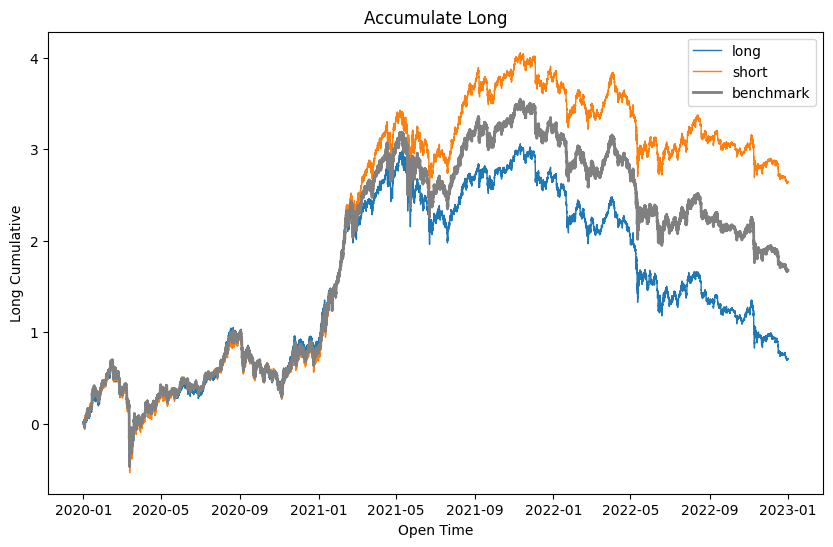

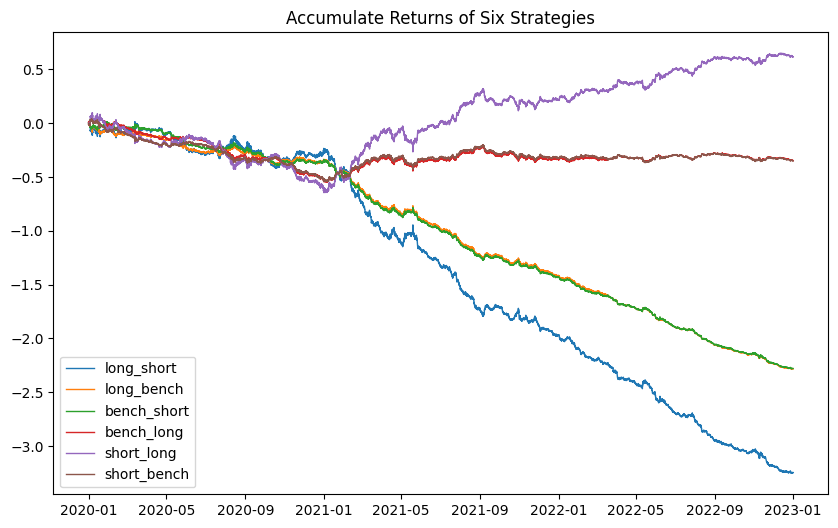

long: 
ann_return = 0.235  sharpe = 0.2138  maxdd = 0.6768  calmar_ratio = 0.3473  

short: 
ann_return = 0.8787  sharpe = 0.8053  maxdd = 0.7269  calmar_ratio = 1.2088  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.0816  sharpe = -3.9482  maxdd = 3.2204  calmar_ratio = -0.3359  

long_bench: 
ann_return = -0.7605  sharpe = -5.4322  maxdd = 2.2892  calmar_ratio = -0.3322  

bench_long: 
ann_return = -0.1155  sharpe = -0.8251  maxdd = 0.5758  calmar_ratio = -0.2006  

short_long: 
ann_return = 0.2056  sharpe = 0.7506  maxdd = 0.6765  calmar_ratio = 0.304  

short_bench: 
ann_return = -0.1168  sharpe = -0.8375  maxdd = 0.5608  calmar_ratio = -0.2083  

bench_short: 
ann_return = -0.7592  sharpe = -5.4417  maxdd = 2.2565  calmar_ratio = -0.3364  



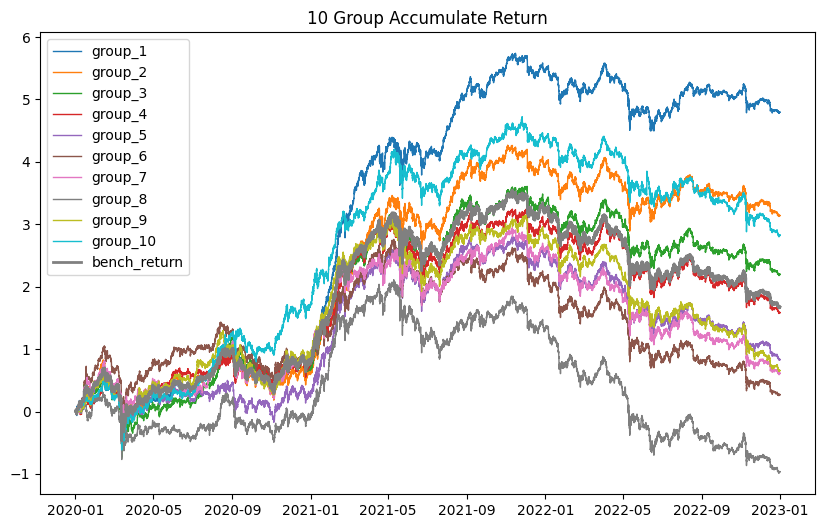

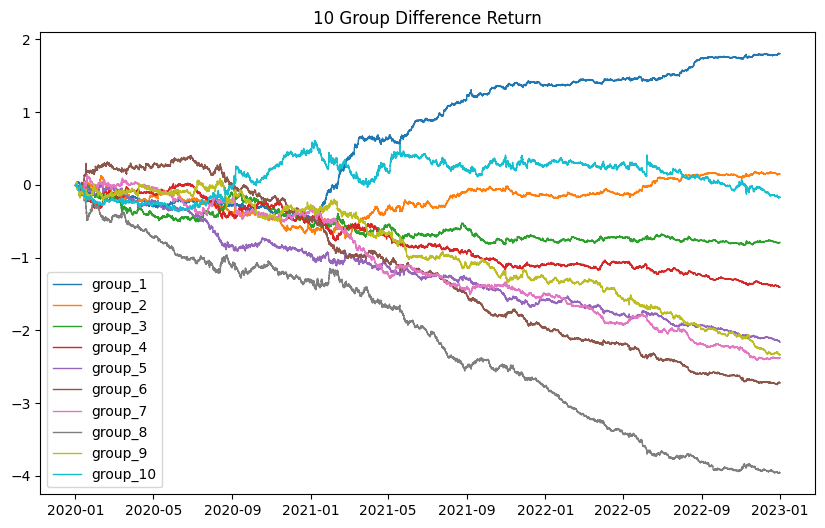

group_1: 
ann_return = 1.5971  sharpe = 1.4658  maxdd = 0.729  calmar_ratio = 2.1909  

group_2: 
ann_return = 1.0452  sharpe = 0.9155  maxdd = 0.7909  calmar_ratio = 1.3216  

group_3: 
ann_return = 0.732  sharpe = 0.6425  maxdd = 0.8363  calmar_ratio = 0.8752  

group_4: 
ann_return = 0.5263  sharpe = 0.4678  maxdd = 0.7054  calmar_ratio = 0.7461  

group_5: 
ann_return = 0.2754  sharpe = 0.242  maxdd = 0.6906  calmar_ratio = 0.3988  

group_6: 
ann_return = 0.0881  sharpe = 0.0762  maxdd = 0.6663  calmar_ratio = 0.1323  

group_7: 
ann_return = 0.2043  sharpe = 0.1744  maxdd = 0.6498  calmar_ratio = 0.3144  

group_8: 
ann_return = -0.3231  sharpe = -0.2769  maxdd = 0.9967  calmar_ratio = -0.3242  

group_9: 
ann_return = 0.2178  sharpe = 0.1848  maxdd = 0.654  calmar_ratio = 0.333  

group_10: 
ann_return = 0.9403  sharpe = 0.8411  maxdd = 0.7425  calmar_ratio = 1.2664  

-----------------------------------------
group_difference_1: 
ann_return = 0.6015  sharpe = 2.0086  maxdd = 0.

In [8]:
factors = df.select(['open_time', 'symbol', 'product_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()